Project requirements (25%): <br>
Groups of 1-3 students will be formed to work on a term-long group project related to software security technologies. <br>
Which Software Security Technologies? Students are asked to use open source data, e.g. <br>
https://data.phishtank.com/ <br> 
https://stackoverflow.com/<br> 
https://www.kaggle.com/datasetsLinks<br> 
and then perform advanced analysis such as AI/ML in Python.

Jupyter Notebook must be used.<br>
The project will be evaluated based on the problem’s importance, solution novelty, technical quality, degree of complexity/efforts creativity, presentation quality, and documentation quality.
The project has two main deliverables: a presentation and a report.
Presentations (10% of the course grade)
All projects will be demonstrated and presented in class.
About 8-10 minutes will be allocated for the demonstration/presentation of each final project. You can present early in the semester or wait for the final weeks (see the course schedule below). Early presenters will be given a break in the score.
Each group member is expected to participate in every phase of the project.
The final grade of each member will be proportional to his/her participation in the group, as assessed by the instructor and the student’s peers.
Each member should be able to answer questions regarding the project, present some part of the project demo, and actively participate in the system implementation and the writing of the technical report.

### Introduction & Objective

Published in 2009, the NSL-KDD dataset was created to help benchmark and test different intrusion detection systems. This dataset is an improved rendition based on the earlier version of the dataset (KDD 99), where improvements would include containing no redundant records in the training dataset, no duplicate records in the testing dataset, a reasonable amount of records within each dataset, and a more balanced selection of records between the different difficulty levels [1]. This ensures that there would be reduced bias over frequent records, improved performance, and higher evaluation accuracy.

To gain a better understanding of the NSL-KDD dataset, the training data and test data will be further analyzed. This will include the usage of Random Forest for classification, in addition to calculating the accuracy, precision, recall and F-1 score values. Since the dataset is fairly large, graphs will also be incorporated to help visualize the data and results from the calculations made. This will include formatted and tabularized data, pie charts that help display data classification, different feature set selection analysis and a ROC curve graph displaying the performance for the data's classification model. Although this will be heavily focused on analysis, this will serve as a good introductory to the importance of datasets for intrusion detection systems.

### Importing Libraries

In [101]:
#https://www.kaggle.com/datasets/hassan06/nslkdd/data
#https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8004032
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

### Loading and formatting the dataset

In [102]:
train_data = pd.read_csv("nsl-kdd/KDDTrain+.txt")
test_data = pd.read_csv("nsl-kdd/KDDTest+.txt")

train_data_df = pd.DataFrame(train_data)
test_data_df = pd.DataFrame(test_data)

In [103]:
# column label for the training and testing datasets
label = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

train_data_df.columns = label
test_data_df.columns = label

In [104]:
# Display the first few rows of the dataset
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [105]:
# Statistical summary of the dataset
train_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


### Labeling and analyzing the different attack types

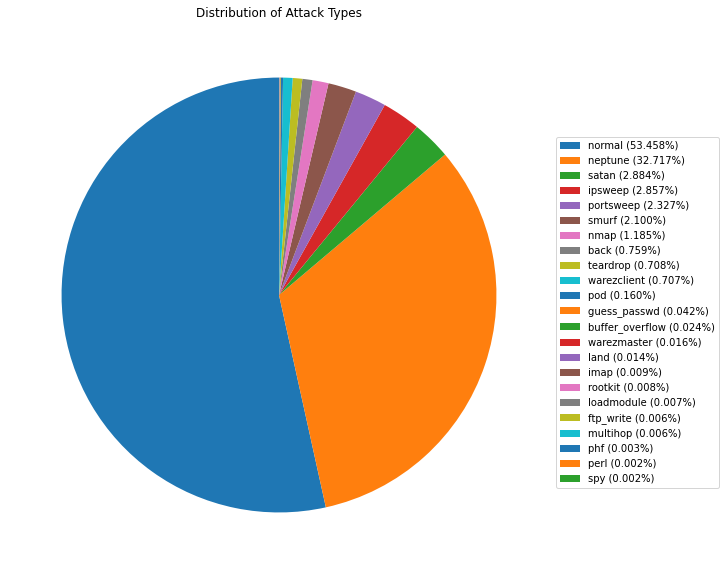

In [106]:
# Append a new column 'is_attack' based on the 'attack' column
train_data['is_attack'] = train_data['attack'].apply(lambda x: 1 if x != 'normal' else 0)
test_data['is_attack'] = test_data['attack'].apply(lambda x: 1 if x != 'normal' else 0)

# Count the occurrences of each attack type
attack_training_count = train_data_df['attack'].value_counts()

# Attack table for training data
plt.figure(figsize=(10, 10))
pieTable = plt.pie(attack_training_count, labels=None, startangle=90)
plt.title('Distribution of Attack Types')
# Legend to contain the attack type and percentage
labels = [f'{label} ({percent:.3f}%)' for label, percent in zip(attack_counts.index, attack_training_count.values / sum(attack_counts) * 100)]
plt.legend(pieTable[0], labels, bbox_to_anchor=(1.0,0.8))
plt.show()

In [ ]:
# convert protocol type to numerical value: 0 = TCP, 1 = UDP, 2 = ICMP
for i in range(len(train_data_df.protocol_type)):
    if train_data_df.protocol_type[i] == 'tcp':
        train_data_df.loc[i, "protocol_type_n"] = 0
        continue
    if train_data_df.protocol_type[i] == 'udp':
        train_data_df.loc[i, "protocol_type_n"] = 1
        continue
    if train_data_df.protocol_type[i] == 'icmp':
        train_data_df.loc[i, "protocol_type_n"] = 2
        continue
        
train_data_df.head()

### Feature Selection

In [ ]:
# Select features based on the most common features 

# # Encode categorical variables
# encoder = LabelEncoder()
# train_data_df['protocol_type'] = encoder.fit_transform(train_data_df['protocol_type'])
# train_data_df['service'] = encoder.fit_transform(train_data_df['service'])
# train_data_df['flag'] = encoder.fit_transform(train_data_df['flag'])
# test_data_df['protocol_type'] = encoder.fit_transform(test_data_df['protocol_type'])
# test_data_df['service'] = encoder.fit_transform(test_data_df['service'])
# test_data_df['flag'] = encoder.fit_transform(test_data_df['flag'])


# # Select the top k features
# selector = SelectKBest(score_func=f_classif, k=10)

# # note: f = msb / msw, to prevent division by 0, the divisor is increased by 10^-9.
# X_train_selected = selector.fit_transform(train_data_df.drop(['attack', 'level'], axis=1) + 1e-9, train_data_df['attack'])
# X_test_selected = selector.transform(test_data_df.drop(['attack', 'level'], axis=1) + 1e-9)

### Conclusion

References <br>
[1] https://www.unb.ca/cic/datasets/nsl.html